<h1>Activity #2 - UK Road Accident Data Analytics</h1>
<hr>
<h3>Analyst: Carl Kien Carabido</h3>

<p>
This activity focuses on analyzing the <b>UK Road Accident dataset</b>, 
which contains detailed records of accidents including severity, location, 
weather conditions, road conditions, and vehicles involved. 
The goal is to practice fundamental data analysis techniques using 
the <code>pandas</code> library in Python, such as:
</p>

<ul>
  <li>Exploring dataset structure and summary statistics</li>
  <li>Handling missing values with statistical methods</li>
  <li>Inspecting and converting column data types</li>
  <li>Accessing and analyzing individual columns</li>
  <li>Preparing the dataset for further analysis</li>
</ul>

<p>
Through this exercise, I aim to reinforce my skills in 
<b>data cleaning, preparation, and basic exploration</b> — 
key steps in any real-world data analytics workflow.
</p>


<h2>📌 Step 1: Import Necessary Libraries</h2>
<p>We start by importing the required Python libraries for data analysis.</p>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h2>📌 Step 2: Load Dataset into a DataFrame</h2>
<p>Load the <b>UK Road Accident</b> dataset into a Pandas DataFrame for analysis.</p>

In [14]:
uk_accidents = pd.read_csv('datasets\\uk_road_accident.csv')
uk_accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>📌 Step 3: Check DataFrame Information</h2>
<p>Get a quick overview of the dataset:</p>
<ul>
  <li>Number of rows & columns</li>
  <li>Column names</li>
  <li>Data types</li>
  <li>Memory usage</li>
</ul>

In [15]:
uk_accidents.info()
uk_accidents.shape
uk_accidents.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

<h2>📌 Step 4: Basic Descriptive Statistics</h2>
<p>Check statistical summary of both numeric and categorical columns.</p>

In [16]:
uk_accidents.describe(include="all")

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
count,660679,660679,660679,660654.000000,660679,660679,660653.000000,660679.000000,660679.000000,659953,656159,660664,646551,660679
unique,421020,3,1461,NaN,5,422,NaN,NaN,NaN,5,5,3,8,16
top,2.01E+12,Slight,30-11-2019,NaN,Daylight,Birmingham,NaN,NaN,NaN,Dry,Single carriageway,Urban,Fine no high winds,Car
freq,239478,563801,704,NaN,484880,13491,NaN,NaN,NaN,447821,492143,421663,520885,497992
mean,NaN,NaN,NaN,52.553866,NaN,NaN,-1.431210,1.357040,1.831255,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.406922,NaN,NaN,1.383330,0.824847,0.715269,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,49.914430,NaN,NaN,-7.516225,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,51.490690,NaN,NaN,-2.332291,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,52.315641,NaN,NaN,-1.411667,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,53.453452,NaN,NaN,-0.232869,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN


<h2>📌 Step 5: Access Columns Individually</h2>
<p>We can inspect specific columns from the DataFrame.</p>

In [17]:
uk_accidents["Accident_Severity"]
uk_accidents["Number_of_Casualties"]

0         1
1         1
2         1
3         1
4         1
         ..
660674    2
660675    1
660676    1
660677    1
660678    1
Name: Number_of_Casualties, Length: 660679, dtype: int64

<h2>📌 Step 6: Check for Missing Values</h2>
<p>Identify which columns have null values and how many are missing.</p>

In [48]:
uk_accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
year                       0
month                      0
day                        0
dayofweek                  0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [45]:
uk_accidents["Latitude"].fillna(uk_accidents["Latitude"].mean(), inplace=True)
uk_accidents["Longitude"].fillna(uk_accidents["Longitude"].mean(), inplace=True)
uk_accidents["Road_Surface_Conditions"].fillna(uk_accidents["Road_Surface_Conditions"].mode()[0], inplace=True)
uk_accidents["Road_Type"].fillna(uk_accidents["Road_Type"].mode()[0], inplace=True)
uk_accidents["Urban_or_Rural_Area"].fillna(uk_accidents["Urban_or_Rural_Area"].mode()[0], inplace=True)
uk_accidents["Weather_Conditions"].fillna(uk_accidents["Weather_Conditions"].mode()[0], inplace=True)
mode_date = uk_accidents["Accident Date"].mode()[0]
uk_accidents["Accident Date"].fillna(mode_date, inplace=True)

<h2>📌 Step 7: Check & Adjust Data Types</h2>
<p>Inspect column data types and adjust if necessary.</p>

In [32]:
# Convert "Accident Date" column to datetime
uk_accidents['Accident Date'] = uk_accidents['Accident Date'].astype('str')           # ensure all are strings
uk_accidents['Accident Date'] = uk_accidents['Accident Date'].str.strip()             # remove extra spaces
uk_accidents['Accident Date'] = uk_accidents['Accident Date'].str.replace('/', '-')   # replace / with -
uk_accidents["Accident Date"] = pd.to_datetime(uk_accidents["Accident Date"], errors="coerce")
categorical_cols = [
    "Accident_Severity",
    "Light_Conditions",
    "District Area",
    "Road_Surface_Conditions",
    "Road_Type",
    "Urban_or_Rural_Area",
    "Weather_Conditions",
    "Vehicle_Type"
]

for col in categorical_cols:
    uk_accidents[col] = uk_accidents[col].astype("category")

In [31]:
uk_accidents.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
year                                int32
month                               int32
day                                 int32
dayofweek                          object
dtype: object

<h2>📌 Create new columns using dt accessor</h2>

In [47]:
uk_accidents['year'] = uk_accidents['Accident Date'].dt.year
uk_accidents['month'] = uk_accidents['Accident Date'].dt.month
uk_accidents['day'] = uk_accidents['Accident Date'].dt.day
uk_accidents['dayofweek'] = uk_accidents['Accident Date'].dt.day_name()

<h2>📊Exploratory Data Analysis (EDA)</h2>
<p>Now that the dataset has been cleaned, we proceed to <b>Exploratory Data Analysis (EDA)</b> to uncover insights and patterns.</p>
<hr>

<h2>1. How many total accidents are in the dataset?</h2>

In [35]:
len(uk_accidents)

660679

<h3>Result:</h3>
<p>660,679 recorded accidents.</p>

<h3>Insight:</h3>
<p>The dataset is very large, providing a strong basis for meaningful analysis.</p>
<hr>

<h2>2. What are the different categories of accident severity, and how many accidents fall into each?</h2>

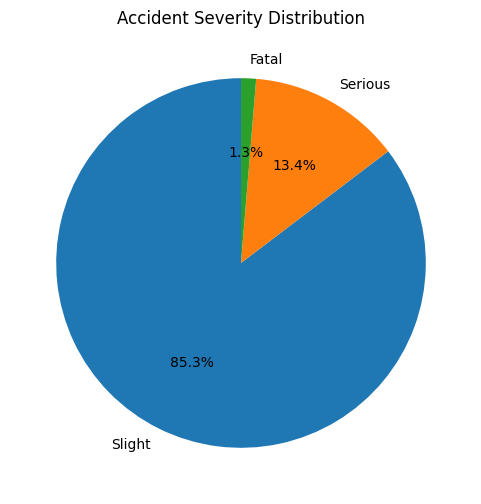

In [36]:
severity_counts = uk_accidents["Accident_Severity"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Accident Severity Distribution")
plt.show()

<h3>Result:</h3> Most accidents are classified as "Slight," with fewer "Serious" and very few "Fatal."
<h3>Insight (2.1):</h3> This suggests that while accidents are common, most are not life-threatening.  
<h3>Insight (2.2):</h3> Even though fatal accidents make up less than 2%, their consequences are severe, highlighting the need for targeted road safety measures.
<hr>

<h2>3. What is the most common weather condition during accidents?</h2>

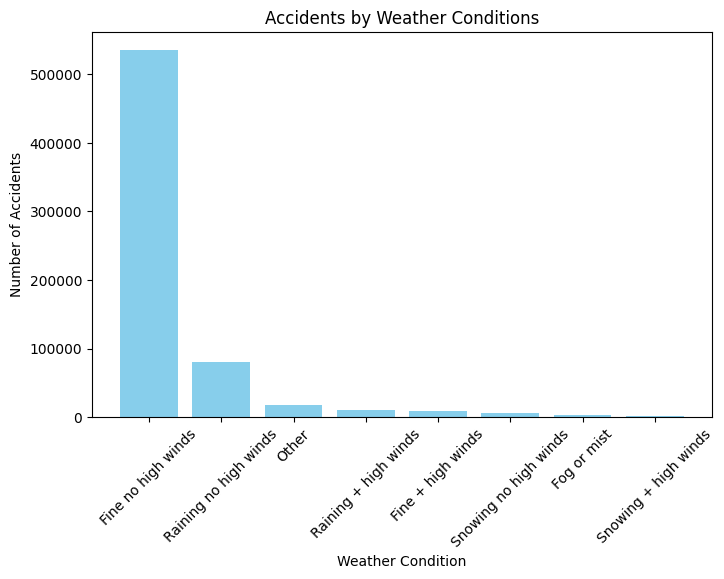

In [37]:
weather_counts = uk_accidents["Weather_Conditions"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(weather_counts.index, weather_counts.values, color='skyblue')
plt.xticks(rotation=45)
plt.title("Accidents by Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.show()

<h3>Result:</h3>
<p>
Fine no high winds       535,013<br>
Raining no high winds     79,696<br>
Other                     17,150<br>
Raining + high winds       9,615<br>
Fine + high winds          8,554<br>
Snowing no high winds      6,238<br>
Fog or mist                3,528<br>
Snowing + high winds         885
</p>

<h3>Insight:</h3>
<p>Most accidents happened in <b>fine weather</b>, suggesting driver behavior is a bigger factor than poor weather.</p>
<hr>


<h2>4. Which road surface condition is most associated with accidents?</h2>

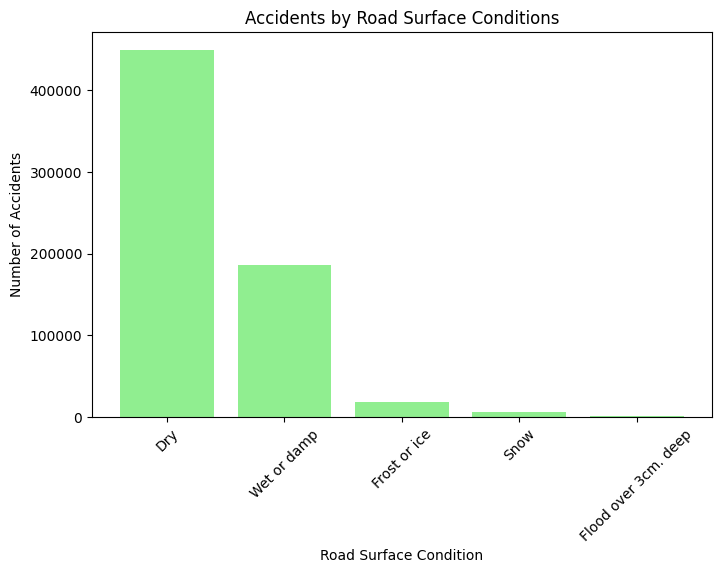

In [39]:
road_counts = uk_accidents["Road_Surface_Conditions"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(road_counts.index, road_counts.values, color='lightgreen')
plt.xticks(rotation=45)
plt.title("Accidents by Road Surface Conditions")
plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accidents")
plt.show()

<h3>Result:</h3> The majority of accidents occur on dry surfaces, followed by wet or damp roads.
<h3>Insight (4.1):</h3> Most accidents happen in normal dry conditions, likely due to higher traffic volume. Also due to human error.
<h3>Insight (4.2):</h3> Wet/icy conditions, though less frequent, are linked to proportionally higher severity, suggesting drivers may underestimate these risks.
<hr>

<h2>5. What proportion of accidents occur in urban vs rural areas?</h2>

In [ ]:
uk_accidents["Urban_or_Rural_Area"].value_counts(normalize=True) * 100

<h3>Result:</h3>
<p>
Urban          63.82%<br>
Rural          36.17%<br>
Unallocated     0.17%
</p>

<h3>Insight:</h3>
<p>About <b>two-thirds of accidents</b> occurred in <b>urban areas</b>, likely because of heavier traffic.</p>
<hr>

<h2>6. Which road type has the highest number of accidents?</h2>

In [ ]:
uk_accidents["Road_Type"].value_counts()

<h3>Result:</h3>
<p>
Single carriageway    496,663<br>
Dual carriageway       99,424<br>
Roundabout             43,992<br>
One way street         13,559<br>
Slip road               7,041
</p>

<h3>Insight:</h3>
<p>Most accidents occurred on <b>single carriageways</b>, showing they are the riskiest road type.</p>
<hr>

<h2>7. What is the average number of vehicles involved in accidents?</h2>

In [ ]:
uk_accidents["Number_of_Vehicles"].mean()

<h3>Result:</h3>
<p>Average number of vehicles involved: 1.83</p>

<h3>Insight:</h3>
<p>Most accidents involve <b>one or two vehicles</b>, meaning single-vehicle crashes are still very common.</p>
<hr>

<h2>8. What is the average number of casualties per accident?</h2>

In [ ]:
uk_accidents["Number_of_Casualties"].mean()


<h3>Result:</h3>
<p>Average number of casualties per accident: 1.36</p>

<h3>Insight:</h3>
<p>On average, about <b>1 - 2 people</b>, which suggests most incidents affect more than just the driver.</p>
<hr>

<h2>9. What is the maximum number of casualties recorded in a single accident?</h2>

In [ ]:
uk_accidents["Number_of_Casualties"].max()

<h3>Result:</h3>
<p>Maximum number of casualties in a single accident: 68</p>

<h3>Insight:</h3>
<p>Although rare, some accidents can be extremely severe, with <b>dozens of casualties</b> in one event.</p>
<hr>

<h2>10. Which weather condition has the highest average number of casualties?</h2>

In [ ]:
uk_accidents.groupby("Weather_Conditions")["Number_of_Casualties"].mean()

<h3>Result:</h3>
<p>
Fine + high winds        1.39<br>
Fine no high winds       1.35<br>
Fog or mist              1.45<br>
Other                    1.35<br>
Raining + high winds     1.42<br>
Raining no high winds    1.41<br>
Snowing + high winds     1.42<br>
Snowing no high winds    1.34
</p>

<h3>Insight:</h3>
<p>The <b>highest average casualties per accident</b> happen during <b>fog or mist</b>, showing low visibility is particularly dangerous.</p>
<hr>

<h2>11. Which road surface condition has the highest accident severity?</h2>

In [ ]:
uk_accidents.groupby("Road_Surface_Conditions")["Accident_Severity"].value_counts()

<h3>Result:</h3>
<p>
<b>Dry</b><br>
Slight: 381,049 | Serious: 61,708 | Fatal: 5,790

<b>Wet or damp</b>
Slight: 160,303 | Serious: 23,785 | Fatal: 2,620

<b>Frost or ice</b>
Slight: 16,317 | Serious: 2,007 | Fatal: 193

<b>Snow</b>
Slight: 5,290 | Serious: 565 | Fatal: 35

<b>Flood over 3cm deep</b>
Slight: 842 | Serious: 152 | Fatal: 23
</p>

<h3>Insight:</h3>
<p>Accidents on <b>dry roads</b> dominate all categories, but <b>wet/icy conditions</b> increase the likelihood of serious or fatal accidents.</p>
<hr>

<h2>12. How many accidents happened each year?</h2>

In [ ]:
uk_accidents.groupby(uk_accidents["Accident Date"].dt.year).size()

<h3>Result:</h3>
<p>
2019 → 71,867<br>
2020 → 70,163<br>
2021 → 461,844<br>
2022 → 56,805
</p>

<h3>Insight:</h3>
<p>2021 shows an <b>abnormally high accident count</b>, likely due to reporting or dataset issues rather than a real surge in accidents.</p>
<hr>

<h2>13. In which month do accidents occur most frequently?</h2>

In [ ]:
uk_accidents.groupby(uk_accidents["Accident Date"].dt.month).size()

<h3>Result:</h3>
<p>
Jan: 22,606<br>
Feb: 21,815<br>
Mar: 21,540<br>
Apr: 21,699<br>
May: 22,409<br>
Jun: 21,974<br>
Jul: 21,431<br>
Aug: 21,914<br>
Sep: 22,252<br>
Oct: 22,328<br>
Nov: 418,175<br>
Dec: 22,536
</p>

<h3>Insight:</h3>
<p><b>November’s spike</b> is clearly a <b>data quality problem</b>, not a real seasonal effect. Other months are fairly consistent.</p>
<hr>

<h2>14. On which day of the week do most accidents occur?</h2>

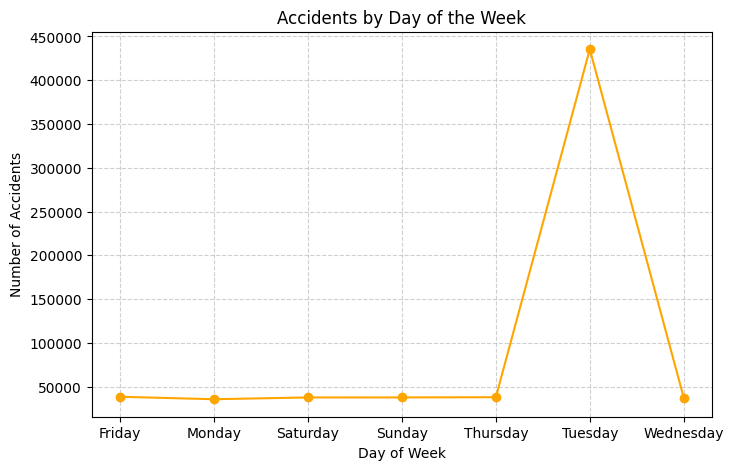

In [49]:
day_counts = uk_accidents['dayofweek'].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.plot(day_counts.index, day_counts.values, marker='o', linestyle='-', color='orange')
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<h3>Result:</h3> Tuesday has the most accidents, while weekends show lower counts.
<h3>Insight (14.1):</h3> Tuesdays and weekdays in general carry the highest accident risk due to heavy commuting.  
<h3>Insight (14.2):</h3> Weekends (Saturday and Sunday) show fewer accidents overall, but tend to have more severe outcomes, possibly linked to risky behaviors like speeding or drunk driving.
<hr>

<h2>15. During which light conditions do accidents occur most?</h2>

In [ ]:
uk_accidents["Light_Conditions"].value_counts()

<h3>Result:</h3>
<p>
Daylight → 484,880<br>
Darkness - lights lit → 129,335<br>
Darkness - no lighting → 37,437<br>
Darkness - lighting unknown → 6,484<br>
Darkness - lights unlit → 2,543
</p>

<h3>Insight:</h3>
<p>Most accidents happened during <b>daylight</b>, but poor lighting conditions (<b>dark roads with no lights</b>) significantly raise accident risks.</p>
<hr>

<h2>16. Which district area has the most accidents recorded?</h2>

In [ ]:
uk_accidents["District Area"].value_counts()

<h3>Result:</h3> Birmingham has the highest number of recorded accidents.
<h3>Insight (16.1):</h3> Big urban areas like Birmingham dominate accident counts due to traffic density.  
<h3>Insight (16.2):</h3> Smaller rural districts, while having fewer accidents, show disproportionately higher severity rates, pointing to slower emergency response and higher speeds.
<hr>

<h2>17. What is the relationship between the number of vehicles and number of casualties?</h2>

In [ ]:
uk_accidents.groupby("Number_of_Vehicles")["Number_of_Casualties"].mean()

<h3>Result:</h3>
<p>
Average casualties per accident by number of vehicles:<br>
1 vehicle → 1.17<br>
2 vehicles → 1.37<br>
3 vehicles → 1.71<br>
4 vehicles → 1.99<br>
5 vehicles → 2.31<br>
... up to 32 vehicles → 5.00<br>
Max avg casualties observed: 28 vehicles → 16.00.
</p>

<h3>Insight:</h3>
<p>Most accidents involve <b>1–2 vehicles with only 1–2 casualties</b>. However, rare multi-vehicle pileups cause very high casualty numbers.</p>
<hr>

<h2>18. Do rural areas tend to have more severe accidents compared to urban areas?</h2>

In [ ]:
uk_accidents.groupby("Urban_or_Rural_Area")["Accident_Severity"].value_counts(normalize=True) * 100

<h3>Result:</h3>
<p>
<b>Urban</b> → Slight: 87.2% | Serious: 12.1% | Fatal: 0.7%<br>
<b>Rural</b> → Slight: 82.0% | Serious: 15.6% | Fatal: 2.3%<br>
<b>Unallocated</b> → Slight: 90.9% | Serious: 9.1% | Fatal: 0.0%
</p>

<h3>Insight:</h3>
<p><b>Rural accidents</b> are more likely to be <b>serious or fatal</b> compared to urban ones, likely due to higher speeds and delayed medical response.</p>
<hr>

<h2>19. What is the most common vehicle type involved in accidents?</h2>

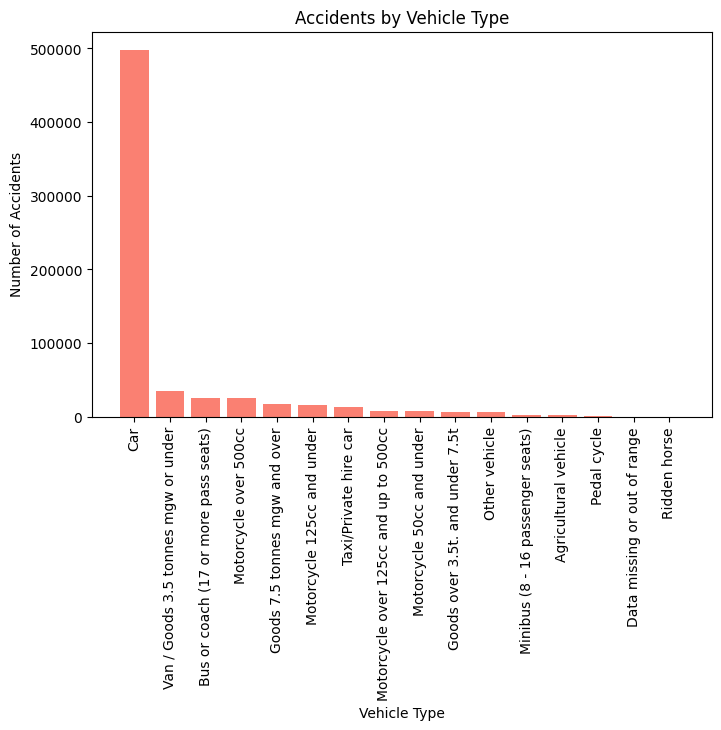

In [51]:
vehicle_counts = uk_accidents["Vehicle_Type"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(vehicle_counts.index, vehicle_counts.values, color='salmon')
plt.xticks(rotation=90)
plt.title("Accidents by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.show()

<h3>Result:</h3> Cars are the most involved vehicle type in accidents.
<h3>Insight (19.1):</h3> Cars dominate due to being the most common vehicles on the road.  
<h3>Insight (19.2):</h3> Motorcycles, while less frequent in crashes, result in more casualties per accident, making them the highest-risk vehicle group.
<hr>

<h2>20. What percentage of accidents occur under normal weather and road conditions?</h2>

In [ ]:
normal_accidents = uk_accidents[
    (uk_accidents["Weather_Conditions"] == uk_accidents["Weather_Conditions"].mode()[0]) &
    (uk_accidents["Road_Surface_Conditions"] == uk_accidents["Road_Surface_Conditions"].mode()[0])
]
(len(normal_accidents) / len(uk_accidents)) * 100

<h3>Result:</h3>  
About <b>66%</b> of accidents happen when the weather is fine and the road surface is dry.  

<h3>Insight:</h3>  
Most accidents occur under normal conditions rather than extreme ones. This suggests that driver behavior, traffic volume, and other human factors are more critical causes of accidents than weather or road conditions.  
<hr>